In [1]:
path='C:/Users/dmckenzie/OneDrive - DLR Group/Desktop/COPY CBRE PRDE 020622.xlsx'

In [2]:
import pandas as pd

In [3]:
PR=pd.read_excel(path)

In [4]:
PR['a. Number of parking spaces '].value_counts()

Poor          121
Good           96
Fair           83
Excellent      70
Don't have     57
Name: a. Number of parking spaces , dtype: int64

In [5]:
PR=pd.concat([PR.iloc[:,:9].reset_index(drop=True),
        PR.iloc[:,9:].\
               replace('Poor',1).\
               replace("Good",3).\
               replace('Fair',2).\
               replace('Excellent',4).\
               replace("Don't have",0).reset_index(drop=True)],
          axis=1)

In [6]:
from plotnine import *

In [7]:
spread=( PR.iloc[:,9:].isna().\
     sum()/448).\
    reset_index().\
    rename(columns={'index':'Column',0:'Percent'}).\
    sort_values('Percent',ascending=False)

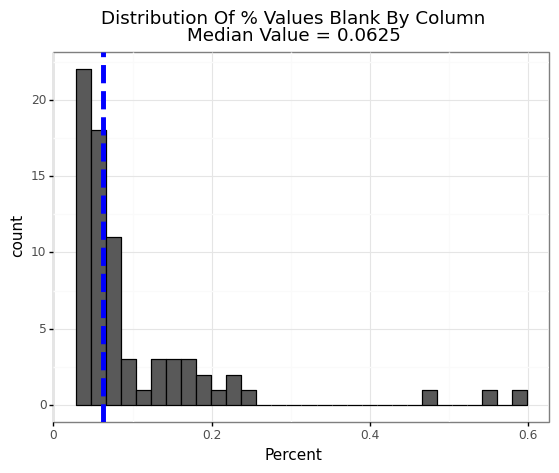

<ggplot: (-9223371863932896268)>

In [8]:
(ggplot(spread,aes('Percent'))+
 geom_histogram(bins=30,color='black')+
 geom_vline(xintercept=spread['Percent'].median(),color='blue',size=2,linetype='dashed')+
 theme_bw()+ggtitle('Distribution Of % Values Blank By Column\nMedian Value = 0.0625'))

In [9]:
spread['Percent'].median()

0.0625

In [10]:
spread.head(50)

,Column,Percent
71,h. Independent Learning Lab,0.582589
72,i. Autism Room,0.560268
70,g. Sensory Room,0.484375
53,d. Learning spaces for performing arts,0.252232
28,l. Intercom/PA,0.218750
17,a. Water heater,0.218750
57,h. Storage for student belongings,0.207589
66,c. View windows providing visual connection be...,0.189732
15,p. Ceilings,0.187500
59,j. Storage for employees' personal items,0.178571


In [11]:
PR.iloc[:,79:].iloc[:,0].value_counts(normalize=True)

0.0    0.829694
1.0    0.082969
2.0    0.056769
3.0    0.021834
4.0    0.008734
Name: g.  Sensory Room, dtype: float64

In [12]:
PR.iloc[:,79:].iloc[:,1].value_counts(normalize=True)

0.0    0.610811
1.0    0.167568
2.0    0.113514
3.0    0.064865
4.0    0.043243
Name: h.  Independent Learning Lab, dtype: float64

In [13]:
PR.iloc[:,79:].iloc[:,2].value_counts(normalize=True)

0.0    0.374359
1.0    0.266667
2.0    0.153846
3.0    0.138462
4.0    0.066667
Name: i.  Autism Room, dtype: float64

In [14]:
for i in spread[spread['Percent']>0][3:]['Column']:
    PR[i]=PR[i].fillna(PR[i].median())

In [15]:
( PR.iloc[:,9:].isna().\
     sum()/448).\
    reset_index().\
    rename(columns={'index':'Column',0:'Percent'}).\
    sort_values('Percent',ascending=False)

,Column,Percent
71,h. Independent Learning Lab,0.582589
72,i. Autism Room,0.560268
70,g. Sensory Room,0.484375
46,q. Quantity of writing surfaces in learning sp...,0.000000
52,c. Learning space(s) for visual arts,0.000000
...,...,...
24,"h. Condition of sinks, toilets, urinals, show...",0.000000
23,"g. Number of sinks, toilets, urinals, showers ...",0.000000
22,f. Quality of interior lighting,0.000000
21,e. Function of power outlets,0.000000


In [63]:
PR.to_csv('C:/Users/dmckenzie/OneDrive - DLR Group/Desktop/COPY CBRE PRDE 020622 CLEANED.csv')